## PIZZA PLACE SALES
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price and ingredients.

## RECOMMENDED ANALYSIS

* How many customers do we have each day? Are there any peak hours?
* How many pizzas are typically in an order? Do we have any bestsellers?
* How much money did we make this year? Can we identify any seasonality in the sales
* Are there any pizzas we should take off the menu, or any promotions we could leverage?

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
order = pd.read_csv("orders.csv")
order.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [32]:
order_details = pd.read_csv("order_details.csv")
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [33]:
pizza = pd.read_csv("pizzas.csv")
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [34]:
pizza_types = pd.read_csv("pizza_types.csv", encoding="latin")
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## FEATURE ENGINEERING

In [35]:
print(order.columns)
print(order_details.columns)
print(pizza.columns)
print(pizza_types.columns)

Index(['order_id', 'date', 'time'], dtype='object')
Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')
Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')
Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')


In [36]:
pizza_df = order.merge(order_details, on="order_id").merge(pizza, on="pizza_id").merge(pizza_types, on="pizza_type_id")
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [37]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [38]:
pizza_df.isna().sum() #Checking the presence of missing data

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [39]:
#Firstly you have to change the datatype of date to datetime such that you can extract the month and day respectively.

pizza_df["date"]=pd.to_datetime(pizza_df["date"])

In [40]:
#Syntax for selecting components from a datetime
pizza_df["date"].dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
48615    2015
48616    2015
48617    2015
48618    2015
48619    2015
Name: date, Length: 48620, dtype: int32

In [41]:
#Adding the day and month columns to the dataframe
pizza_df["day"] = pizza_df["date"].dt.dayofweek + 1
pizza_df["month"] = pizza_df["date"].dt.month

In [42]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",4,1
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",7,1


In [43]:
#Knowing the number of different items present in a column ascribed to a particular dataframe.
pizza_df.day.unique()
pizza_df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [44]:
#Extracting hours from a particular in the dataframe
pizza_df["hour"]=pd.to_datetime(pizza_df.time).dt.hour

C:\Users\User\AppData\Local\Temp\ipykernel_13304\228807170.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pizza_df["hour"]=pd.to_datetime(pizza_df.time).dt.hour


In [45]:
day = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}
month = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",8:"August",9:"September",10:"October", 11:"November", 12:"December"}


In [46]:
#Syntax for mapping a dictionary to a particular column
pizza_df["day"] = pizza_df.day.map(day)

In [47]:
pizza_df["month"] = pizza_df.month.map(month)

In [48]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,January,11
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,January,12
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,January,14
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,January,16
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,January,20


In [49]:
#Calculating the overall price of every pizza and its quantity.
pizza_df["Sales"] = pizza_df["quantity"]*pizza_df["price"] 

In [50]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour,Sales
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,January,11,13.25
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,January,12,13.25
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,January,14,13.25
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,January,16,13.25
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,January,20,13.25


# HOW MANY PIZZAS WERE SOLD IN A YEAR

In [51]:
pizza_df["quantity"].sum()

49574

## Ans: 49574 pieces of pizza were sold in the year 2015 

## HOW MANY DAYS DID THE RESTAURANT OPERATE


In [52]:
#First approach
pizza_df[~pizza_df.date.duplicated()].count()[1]

358

In [53]:
#Second approach
pizza_df.date.count() - pizza_df.date.duplicated().sum()

358

# Ans: The company operated for 358 working days in the year under review

# HOW MANY ORDERS WERE PLACED IN THE SAME YEAR

In [54]:
pizza_df.order_id.count() - pizza_df.order_id.duplicated().sum() 

21350

## Ans: The company had 21350 orders in the year under review

In [55]:
#Similarly you can drop duplicates and count.
pizza_df.order_id.drop_duplicates().count()

21350

# HOW MUCH MONEY WAS MADE


In [56]:
pizza_df.Sales.sum()

817860.05

## Ans: GHS. 817860.05 is the amount of money they made in the year under review

# WHICH AMONGST THE DAYS IS THE BUSIEST

In [29]:
#Using the groupby clause to sort the datasets in the dataframe according to days.
pizza_df.groupby("day")["quantity"].sum()

day
Friday       8242
Monday       6485
Saturday     7493
Sunday       6035
Thursday     7478
Tuesday      6895
Wednesday    6946
Name: quantity, dtype: int64

In [64]:
#Syntax for inserting a dataframe inorder to make the presentation more presentable
day_df = pd.DataFrame(pizza_df.groupby("day")["quantity"].sum().sort_values(ascending=False)).reset_index()

day_df["qty_pct"] = round(day_df["quantity"]/day_df["quantity"].sum()*100,2)

In [66]:
day_df

,day,quantity,qty_pct
0,Friday,8242,16.63
1,Saturday,7493,15.11
2,Thursday,7478,15.08
3,Wednesday,6946,14.01
4,Tuesday,6895,13.91
5,Monday,6485,13.08
6,Sunday,6035,12.17


Text(0.5, 1.0, 'DESCENDING ORDER OF BUSIEST DAY')

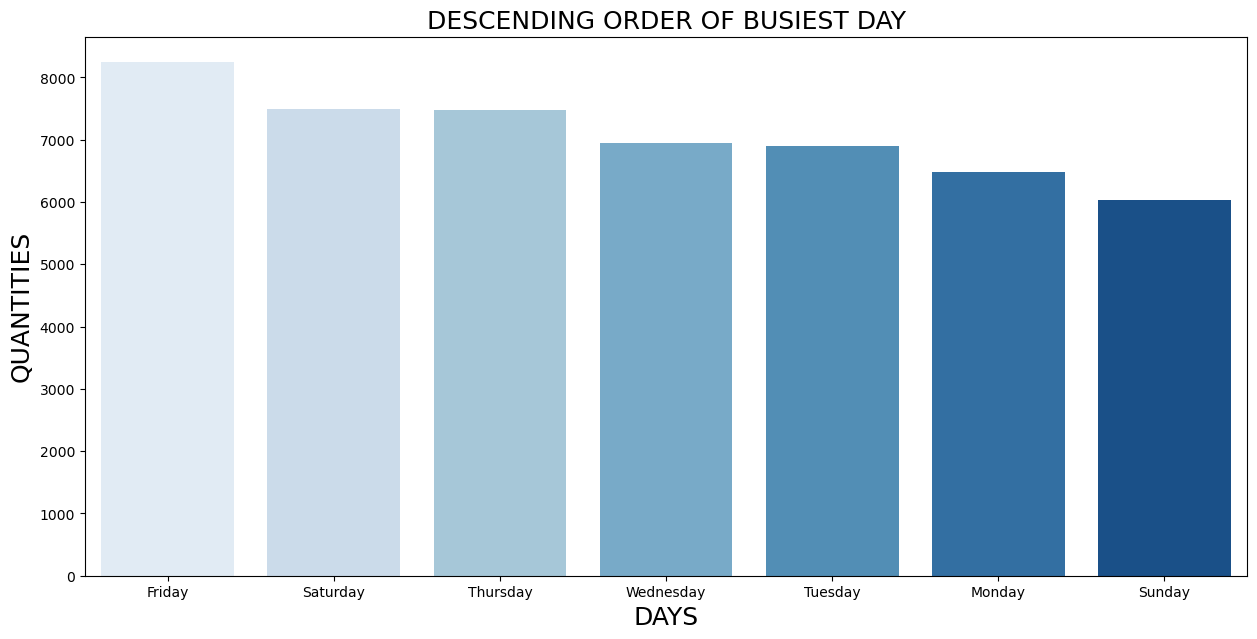

In [82]:
plt.figure(figsize=(15,7))
sns.barplot(data=day_df,x="day",y="quantity", palette="Blues")
plt.xlabel("DAYS",fontsize=18)
plt.ylabel("QUANTITIES",fontsize=18)
plt.title("DESCENDING ORDER OF BUSIEST DAY",fontsize=18)